# <font color = lightcoral>Inference Data Prep
>    

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [2]:
import pandas as pd
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part1 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training  ######################

print("\n" + "*"*100)
print("********************** Part 2:  Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :20].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Event_ID to Template Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 3: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 4: Event_ID to Encoding Mapping  #######################################

print("\n" + "*"*100)
print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)


****************************************************************************************************
********************** Part1 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2:  Input Data with Features ******************************************
****************************************************************************************************



,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2
4,2005-06-03 16:00:00,4,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228
5,2005-06-03 16:05:00,5,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987
6,2005-06-03 16:10:00,6,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430
7,2005-06-03 16:15:00,7,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987
8,2005-06-03 16:25:00,9,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504


Shape of Encoded File with Features: (14537, 35451)

****************************************************************************************************
********************** Part 3: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 4:  Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)


---

## <font color = blue> Part 1. Generate and Save the Test File

In [3]:
# import os
# import pandas as pd
# import numpy as np
# import random
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from datetime import datetime

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'

# # Generate timestamp and serial number
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# serial_number = "0001"  # You can increment this for each run
# file_prefix = f"{timestamp}_non_overlap_full_test"

# # Required parameters
# max_events = 40
# input_length = 20
# gap = 2
# prediction_period = 1
# test_size = 0.2
# shuffle = False
# random_seed = 42

# # Set random seed for reproducibility
# np.random.seed(random_seed)
# random.seed(random_seed)

# # Data Preprocessing
# df = pd.read_parquet(input_file)

# selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
#                     'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
#                     'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
#                     'rolling_event_count', 'rolling_unique_event_count']
# event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# df[event_id_columns].replace(-1, 0, inplace=True)

# scaler = StandardScaler()
# numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
#                       'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
#                       'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
# df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# label_encoder = LabelEncoder()
# df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# pca = PCA(n_components=max_events)
# event_id_pca = pca.fit_transform(df[event_id_columns])
# event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
#     sequences = []
#     targets = []
    
#     start_idx = 0
#     total_length = len(data)
#     while start_idx + input_length + gap + prediction_period <= total_length:
#         end_idx = start_idx + input_length
#         sequence = data[feature_cols].iloc[start_idx:end_idx].values
#         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
#         sequences.append(sequence)
#         targets.append(target)
#         start_idx = end_idx + gap + prediction_period
    
#     return np.array(sequences), np.array(targets)

# feature_cols = [col for col in df_reduced.columns if col != 'Class']
# target_col = 'Class'

# X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# _, X_test, _, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# # Save the test data
# np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
# np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)

# print(f"Test data saved to {output_dir}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")
# print(f"File prefix: {file_prefix}")

### <font color = grey> Display Test File

In [4]:
import numpy as np

# Define the paths to the .npy files
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
file_prefix = "20240714_062624_non_overlap_full_test"
x_test_file = f"{data_dir}/{file_prefix}_X_test.npy"
y_test_file = f"{data_dir}/{file_prefix}_y_test.npy"

# Load the test data
X_test = np.load(x_test_file)
y_test = np.load(y_test_file)

# Display the shapes and first few records
X_test_shape = X_test.shape
y_test_shape = y_test.shape
# X_test_first_n = X_test[:1]
# y_test_first_n = y_test[:1]

print("X_test shape:", X_test_shape)
print("y_test shape:", y_test_shape)
# print("First n records in X_test:", X_test_first_n)
# print("First n records in y_test:", y_test_first_n)

# Convert the first n records to DataFrames for better display
X_test_first_n_df = pd.DataFrame(X_test[:1].reshape(-1, X_test.shape[2]))
y_test_first_n_df = pd.DataFrame(y_test[:1], columns=["Class"])

# Display the DataFrames
display(X_test_first_n_df)
display(y_test_first_n_df)

################### About the data ###########

# Input Length = 20 (ie 20 time stamps, say 11:00 to 12:40)
# max_lenght(fevents) = 40
# total feature list = 55 (this include 40 events and 15 derived features)

X_test shape: (127, 20, 56)
y_test shape: (127,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,45510.0,-0.364160,11.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.200941,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.257510,-0.659998,-2047.870864,862.787984,-534.718270,440.094515,-283.303228,-161.234216,349.471686,29.455197,-136.915977,-212.025750,-60.999929,237.803726,32.777915,21.176680,-114.194870,148.200624,-19.540514,-63.003840,41.384577,80.036103,22.008479,109.725264,-94.333692,37.236123,-19.997967,58.240053,-54.420031,54.705458,-70.859203,-13.074278,1.860684,-7.516986,70.509727,-135.882827,-93.451614,-36.512232,-20.111325,-60.338670,-76.343065,27.656285
1,45514.0,0.104469,80.0,-0.057064,1.006346,0.596130,-0.952078,-0.196450,0.051642,-0.205392,1.022858,1.732448,-0.866508,1.625772e+00,-0.256379,-0.490115,-2048.817332,863.891268,-535.619773,440.995019,-283.801159,-161.953330,351.093142,29.823787,-137.348242,-212.285406,-60.799247,239.860088,34.062508,21.861439,-113.887760,150.439903,-18.753106,-64.995829,42.856527,81.853350,21.908611,111.426033,-99.750063,42.373495,-20.631142,59.781529,-56.650289,53.382343,-71.627494,-14.530250,1.451952,-5.405249,79.218541,-152.468812,-120.039977,-74.278016,-26.132495,-103.639051,-136.116477,16.057502
2,45519.0,-0.364160,41.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.196489,-0.854291,-0.577218,1.006346,-1.625772e+00,-0.257510,-0.490115,-2043.764103,857.409369,-529.296502,433.276907,-278.787281,-154.618847,333.713196,25.098934,-126.876196,-194.748810,-54.946318,193.178934,23.533150,15.032858,-88.857854,96.529464,-16.293820,-33.666993,20.822308,40.115838,11.166104,44.429169,-28.399684,4.231447,-5.164654,15.161668,-15.972033,6.244275,-16.403934,-8.823143,-5.209376,4.025342,-3.344977,13.722684,2.859107,-85.908346,14.066307,-64.900077,-105.809419,-64.690254
3,45525.0,-0.207950,13.0,-0.070972,0.170372,0.751345,-0.952078,0.445165,0.051642,-0.205392,-0.851236,-0.577218,-0.866508,9.000867e-01,-0.092292,-0.433488,-2048.155512,863.054993,-534.836536,440.025630,-283.205549,-160.991849,348.822534,29.126211,-135.960681,-209.921101,-60.004484,233.327260,32.627742,20.941631,-110.402720,142.812040,-18.402857,-60.521493,39.684404,75.819158,20.292867,101.512429,-89.229645,36.778951,-18.289753,53.133180,-50.735711,46.003461,-63.341987,-13.895835,0.227459,-3.729078,66.649256,-126.881492,-101.314007,-78.767558,-19.278165,-99.175034,-133.799944,1.499291
4,45526.0,-0.364160,41.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,0.445124,-0.854291,-0.577218,0.170372,-9.000867e-01,-0.093423,-0.433488,-2047.415157,862.256772,-534.284213,439.660938,-283.063484,-160.887976,348.690985,29.277728,-136.707850,-211.900730,-61.096554,236.813625,32.159407,20.846982,-114.342738,147.122452,-19.919636,-62.044734,40.675861,79.161132,22.056564,108.906376,-91.725810,34.762573,-19.693105,57.497861,-53.346202,55.342513,-70.489286,-12.373255,2.057481,-8.533748,66.316595,-127.896983,-80.649810,-18.328707,-17.212243,-39.490339,-47.563274,33.240884
5,45529.0,-0.364160,11.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,-0.205392,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.093423,-0.433488,-2033.174703,843.167631,-514.244373,415.080078,-265.778112,-138.875240,296.438409,17.372271,-106.050953,-161.486736,-44.157720,116.428149,5.609284,2.951569,-49.139049,21.591154,-12.894200,6.501881,-5.699249,-7.010856,0.276925,-22.218588,43.822881,-34.327005,6.731043,-19.886992,19.994160,-20.600380,21.515890,1.295047,-5.247820,0.814358,-58.427301,119.872937,112.858899,43.421455,36.202966,87.127718,104.175937,-31.276369
6,45537.0,-0.051740,20.0,-0.069234,0.776909,0.906560,-0.952078,-0.204081,0.051642,-0.205392,1.231431,1.732448,-0.866508,1.426604e+00,-0.095361,-0.490115,-208.833676,-1870.454029,2542.758475,-2836.203720,1916.558019,1117.027561,-1934.357737,-49.123821,-178.137637,-603.617787,-398.651854,1139.348120,5.278336,-150.515412,7

,Class
0,0.0


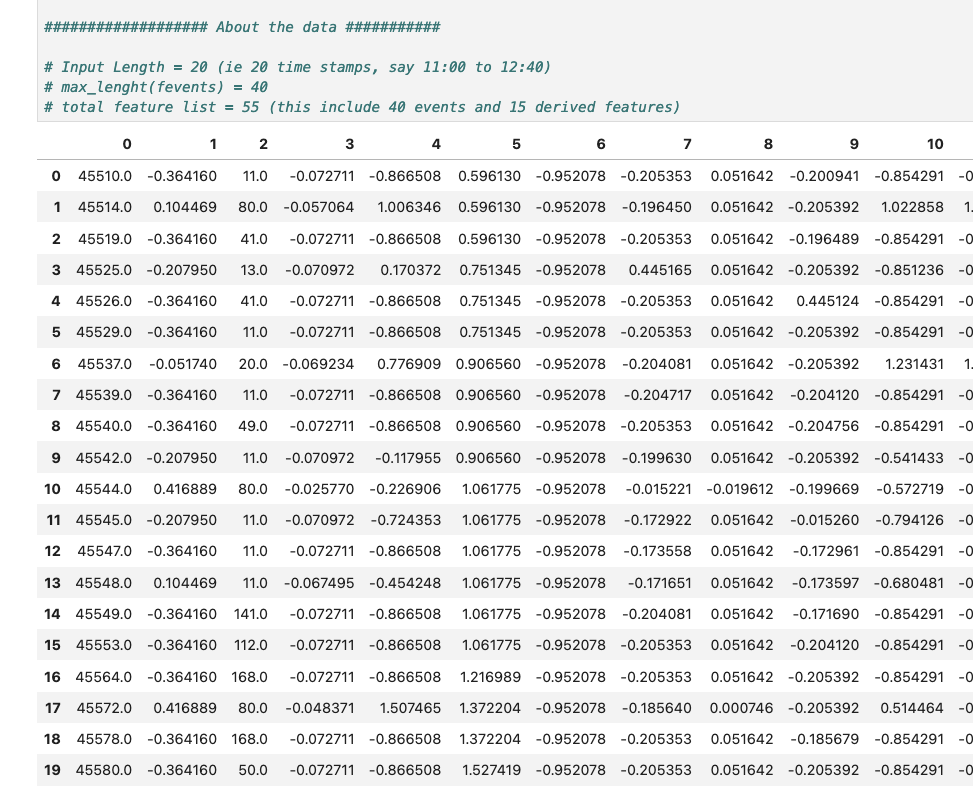

# <font color = red> Validating the Test set Index matches original test file

### <font color = blue> Part (A) Comprehensive Match by replicating original logic to create test files

In [15]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from datetime import datetime

# Explanation of the data mapping
print("\n" + "*"*100)
print("********************** Explanation of the Data Mapping ******************************************")
print("*"*100 + "\n")
print("Each sequence in the test data corresponds to a set of 20 input rows from the original data.")
print("The sequences are created by sliding a window of 20 rows with a gap of 2 rows between each sequence.")
print("This ensures that there is no overlap between the sequences.")
print("\nBelow are the mappings of the first few sequences from the input data to the sequences in the test data:")

# Define the path to the source file and the test data files
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
x_test_file = f"{output_dir}/20240714_062624_non_overlap_full_test_X_test.npy"  # Replace with actual file prefix if needed
y_test_file = f"{output_dir}/20240714_062624_non_overlap_full_test_y_test.npy"  # Replace with actual file prefix if needed

# Load the source file
df = pd.read_parquet(encoded_feature_input_file)

# Load the test data
X_test = np.load(x_test_file)
y_test = np.load(y_test_file)

# Define parameters
input_length = 20
gap = 2
prediction_period = 1
total_length = input_length + gap + prediction_period
test_size = 0.2
max_events = 40  # Use max_events as a parameter
random_seed = 42
shuffle = False

# Calculate the starting and ending index for the test set in the original data
total_rows = len(df)
test_start_idx = int(total_rows * (1 - test_size))
test_end_idx = total_rows - 1

print("\n" + "*"*100)
print("********************** Test Set Indices ******************************************")
print("*"*100 + "\n")
print(f"The starting index of the test set in the original data is: {test_start_idx}")
print(f"The ending index of the test set in the original data is: {test_end_idx}")

# Verify the starting index matches with the logic used for splitting the data
# Recreate the sequence and split logic to ensure it matches

# Data Preprocessing
selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
                    'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
                    'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
                    'rolling_event_count', 'rolling_unique_event_count']
event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

df[event_id_columns].replace(-1, 0, inplace=True)

scaler = StandardScaler()
numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
                      'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
                      'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

label_encoder = LabelEncoder()
df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

pca = PCA(n_components=max_events)
event_id_pca = pca.fit_transform(df[event_id_columns])
event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
    sequences = []
    targets = []
    
    start_idx = 0
    total_length = len(data)
    while start_idx + input_length + gap + prediction_period <= total_length:
        end_idx = start_idx + input_length
        sequence = data[feature_cols].iloc[start_idx:end_idx].values
        target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
        sequences.append(sequence)
        targets.append(target)
        start_idx = end_idx + gap + prediction_period
    
    return np.array(sequences), np.array(targets)

feature_cols = [col for col in df_reduced.columns if col != 'Class']
target_col = 'Class'

X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# Split the sequences into training and testing sets
_, X_test_recalculated, _, y_test_recalculated = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# Check if the recalculated test set matches the loaded test set
print("\n" + "*"*100)
print("********************** Test Set Shapes ******************************************")
print("*"*100 + "\n")
print(f"Loaded X_test shape: {X_test.shape}")
print(f"Recalculated X_test shape: {X_test_recalculated.shape}")

print(f"Loaded y_test shape: {y_test.shape}")
print(f"Recalculated y_test shape: {y_test_recalculated.shape}")

if not np.array_equal(X_test, X_test_recalculated):
    print("Mismatch in X_test")
    # Display a few samples from each to diagnose the issue
    print("\n" + "*"*100)
    print("********************** Loaded X_test Samples ******************************************")
    print("*"*100 + "\n")
    df_loaded_X_test = pd.DataFrame(X_test[:2].reshape(2, -1))
    display(df_loaded_X_test)
    
    print("\n" + "*"*100)
    print("********************** Recalculated X_test Samples ******************************************")
    print("*"*100 + "\n")
    df_recalculated_X_test = pd.DataFrame(X_test_recalculated[:2].reshape(2, -1))
    display(df_recalculated_X_test)

if not np.array_equal(y_test, y_test_recalculated):
    print("Mismatch in y_test")
    # Display a few samples from each to diagnose the issue
    print("\n" + "*"*100)
    print("********************** Loaded y_test Samples ******************************************")
    print("*"*100 + "\n")
    df_loaded_y_test = pd.DataFrame(y_test[:10])
    display(df_loaded_y_test)
    
    print("\n" + "*"*100)
    print("********************** Recalculated y_test Samples ******************************************")
    print("*"*100 + "\n")
    df_recalculated_y_test = pd.DataFrame(y_test_recalculated[:10])
    display(df_recalculated_y_test)

# Generate the mapping from test sequences to original indices
sequence_to_input_indices = []

start_idx = test_start_idx
while start_idx + input_length <= test_end_idx:  # Adjust to ensure we capture all possible sequences
    end_idx = start_idx + input_length
    if end_idx <= test_end_idx:
        sequence_indices = list(range(start_idx, end_idx))
        sequence_to_input_indices.append(sequence_indices)
    start_idx += input_length + gap + prediction_period  # Adjust the start index correctly to match sequence generation logic

# Display the mapping for the first few sequences
n = 10  # Number of sequences to display
# print("\n" + "*"*100)
# print("********************** Sequence to Input Rows Mapping ******************************************")
# print("*"*100 + "\n")
# print(f"\nDisplaying the first {n} mappings of input rows to sequences:")
# for seq_idx, input_indices in enumerate(sequence_to_input_indices[:n]):
#     formatted_indices = [f"{idx:<5}" for idx in input_indices]  # Format indices for uniform column width
#     rows = [formatted_indices[i:i + max_events] for i in range(0, len(formatted_indices), max_events)]
#     print(f"\nSequence {seq_idx + 1}:")
#     for row in rows:
#         print(" ".join(row))

# Convert the mapping to a DataFrame for better visualization
mapping_df = pd.DataFrame(sequence_to_input_indices[:len(X_test)])

# Display the mapping DataFrame
print("\n" + "*"*100)
print("********************** Mapping DataFrame ******************************************")
print("*"*100 + "\n")
display(mapping_df.head(n))


****************************************************************************************************
********************** Explanation of the Data Mapping ******************************************
****************************************************************************************************

Each sequence in the test data corresponds to a set of 20 input rows from the original data.
The sequences are created by sliding a window of 20 rows with a gap of 2 rows between each sequence.
This ensures that there is no overlap between the sequences.

Below are the mappings of the first few sequences from the input data to the sequences in the test data:

****************************************************************************************************
********************** Test Set Indices ******************************************
****************************************************************************************************

The starting index of the test set in the original

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021


****************************************************************************************************
********************** Recalculated X_test Samples ******************************************
****************************************************************************************************



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021


****************************************************************************************************
********************** Mapping DataFrame ******************************************
****************************************************************************************************



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11629,11630,11631,11632,11633,11634,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644,11645,11646,11647,11648
1,11652,11653,11654,11655,11656,11657,11658,11659,11660,11661,11662,11663,11664,11665,11666,11667,11668,11669,11670,11671
2,11675,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694
3,11698,11699,11700,11701,11702,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712,11713,11714,11715,11716,11717
4,11721,11722,11723,11724,11725,11726,11727,11728,11729,11730,11731,11732,11733,11734,11735,11736,11737,11738,11739,11740
5,11744,11745,11746,11747,11748,11749,11750,11751,11752,11753,11754,11755,11756,11757,11758,11759,11760,11761,11762,11763
6,11767,11768,11769,11770,11771,11772,11773,11774,11775,11776,11777,11778,11779,11780,11781,11782,11783,11784,11785,11786
7,11790,11791,11792,11793,11794,11795,11796,11797,11798,11799,11800,11801,11802,11803,11804,11805,11806,11807,11808,11809
8,11813,11814,11815,11816,11817,11818,11819,11820,11821,11822,11823,11824,11825,11826,11827,11828,11829,11830,11831,11832
9,11836,11837,11838,11839,11840,11841,11842,11843,11844,11845,11846,11847,11848,11849,11850,11851,11852,11853,11854,11855


In [18]:
# Display the mapping for the first few sequences
n = 127  # Number of sequences to display
mapping_df = pd.DataFrame(sequence_to_input_indices[:len(X_test)])

# Display the mapping DataFrame
print("\n" + "*"*100)
print("********************** Mapping DataFrame ******************************************")
print("*"*100 + "\n")
display(mapping_df.head(n))

# Check if the recalculated test set matches the loaded test set
print("\n" + "*"*100)
print("********************** Test Set Shapes ******************************************")
print("*"*100 + "\n")
print(f"Loaded X_test shape: {X_test.shape}")
print(f"Recalculated X_test shape: {X_test_recalculated.shape}")

print(f"Loaded y_test shape: {y_test.shape}")
print(f"Recalculated y_test shape: {y_test_recalculated.shape}")

if not np.array_equal(X_test, X_test_recalculated):
    print("Mismatch in X_test")
    # Display the first sequence from each to diagnose the issue
    print("\n" + "*"*100)
    print("********************** Loaded X_test Samples ******************************************")
    print("*"*100 + "\n")
    df_loaded_X_test = pd.DataFrame(X_test[0], columns=feature_cols)
    display(df_loaded_X_test)
    
    print("\n" + "*"*100)
    print("********************** Recalculated X_test Samples ******************************************")
    print("*"*100 + "\n")
    df_recalculated_X_test = pd.DataFrame(X_test_recalculated[0], columns=feature_cols)
    display(df_recalculated_X_test)
else:
    print("X_test matches")

if not np.array_equal(y_test, y_test_recalculated):
    print("Mismatch in y_test")
    # Display a few samples from each to diagnose the issue
    print("\n" + "*"*100)
    print("********************** Loaded y_test Samples ******************************************")
    print("*"*100 + "\n")
    df_loaded_y_test = pd.DataFrame(y_test[:10])
    display(df_loaded_y_test)
    
    print("\n" + "*"*100)
    print("********************** Recalculated y_test Samples ******************************************")
    print("*"*100 + "\n")
    df_recalculated_y_test = pd.DataFrame(y_test_recalculated[:10])
    display(df_recalculated_y_test)
else:
    print("y_test matches")


****************************************************************************************************
********************** Mapping DataFrame ******************************************
****************************************************************************************************



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11629,11630,11631,11632,11633,11634,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644,11645,11646,11647,11648
1,11652,11653,11654,11655,11656,11657,11658,11659,11660,11661,11662,11663,11664,11665,11666,11667,11668,11669,11670,11671
2,11675,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694
3,11698,11699,11700,11701,11702,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712,11713,11714,11715,11716,11717
4,11721,11722,11723,11724,11725,11726,11727,11728,11729,11730,11731,11732,11733,11734,11735,11736,11737,11738,11739,11740
5,11744,11745,11746,11747,11748,11749,11750,11751,11752,11753,11754,11755,11756,11757,11758,11759,11760,11761,11762,11763
6,11767,11768,11769,11770,11771,11772,11773,11774,11775,11776,11777,11778,11779,11780,11781,11782,11783,11784,11785,11786
7,11790,11791,11792,11793,11794,11795,11796,11797,11798,11799,11800,11801,11802,11803,11804,11805,11806,11807,11808,11809
8,11813,11814,11815,11816,11817,11818,11819,11820,11821,11822,11823,11824,11825,11826,11827,11828,11829,11830,11831,11832
9,11836,11837,11838,11839,11840,11841,11842,11843,11844,11845,11846,11847,11848,11849,11850,11851,11852,11853,11854,11855



****************************************************************************************************
********************** Test Set Shapes ******************************************
****************************************************************************************************

Loaded X_test shape: (127, 20, 56)
Recalculated X_test shape: (127, 20, 56)
Loaded y_test shape: (127,)
Recalculated y_test shape: (127,)
Mismatch in X_test

****************************************************************************************************
********************** Loaded X_test Samples ******************************************
****************************************************************************************************



,time_start_int,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_PCA_1,EventId_PCA_2,EventId_PCA_3,EventId_PCA_4,EventId_PCA_5,EventId_PCA_6,EventId_PCA_7,EventId_PCA_8,EventId_PCA_9,EventId_PCA_10,EventId_PCA_11,EventId_PCA_12,EventId_PCA_13,EventId_PCA_14,EventId_PCA_15,EventId_PCA_16,EventId_PCA_17,EventId_PCA_18,EventId_PCA_19,EventId_PCA_20,EventId_PCA_21,EventId_PCA_22,EventId_PCA_23,EventId_PCA_24,EventId_PCA_25,EventId_PCA_26,EventId_PCA_27,EventId_PCA_28,EventId_PCA_29,EventId_PCA_30,EventId_PCA_31,EventId_PCA_32,EventId_PCA_33,EventId_PCA_34,EventId_PCA_35,EventId_PCA_36,EventId_PCA_37,EventId_PCA_38,EventId_PCA_39,EventId_PCA_40
0,45510.0,-0.364160,11.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.200941,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.257510,-0.659998,-2047.870864,862.787984,-534.718270,440.094515,-283.303228,-161.234216,349.471686,29.455197,-136.915977,-212.025750,-60.999929,237.803726,32.777915,21.176680,-114.194870,148.200624,-19.540514,-63.003840,41.384577,80.036103,22.008479,109.725264,-94.333692,37.236123,-19.997967,58.240053,-54.420031,54.705458,-70.859203,-13.074278,1.860684,-7.516986,70.509727,-135.882827,-93.451614,-36.512232,-20.111325,-60.338670,-76.343065,27.656285
1,45514.0,0.104469,80.0,-0.057064,1.006346,0.596130,-0.952078,-0.196450,0.051642,-0.205392,1.022858,1.732448,-0.866508,1.625772e+00,-0.256379,-0.490115,-2048.817332,863.891268,-535.619773,440.995019,-283.801159,-161.953330,351.093142,29.823787,-137.348242,-212.285406,-60.799247,239.860088,34.062508,21.861439,-113.887760,150.439903,-18.753106,-64.995829,42.856527,81.853350,21.908611,111.426033,-99.750063,42.373495,-20.631142,59.781529,-56.650289,53.382343,-71.627494,-14.530250,1.451952,-5.405249,79.218541,-152.468812,-120.039977,-74.278016,-26.132495,-103.639051,-136.116477,16.057502
2,45519.0,-0.364160,41.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.196489,-0.854291,-0.577218,1.006346,-1.625772e+00,-0.257510,-0.490115,-2043.764103,857.409369,-529.296502,433.276907,-278.787281,-154.618847,333.713196,25.098934,-126.876196,-194.748810,-54.946318,193.178934,23.533150,15.032858,-88.857854,96.529464,-16.293820,-33.666993,20.822308,40.115838,11.166104,44.429169,-28.399684,4.231447,-5.164654,15.161668,-15.972033,6.244275,-16.403934,-8.823143,-5.209376,4.025342,-3.344977,13.722684,2.859107,-85.908346,14.066307,-64.900077,-105.809419,-64.690254
3,45525.0,-0.207950,13.0,-0.070972,0.170372,0.751345,-0.952078,0.445165,0.051642,-0.205392,-0.851236,-0.577218,-0.866508,9.000867e-01,-0.092292,-0.433488,-2048.155512,863.054993,-534.836536,440.025630,-283.205549,-160.991849,348.822534,29.126211,-135.960681,-209.921101,-60.004484,233.327260,32.627742,20.941631,-110.402720,142.812040,-18.402857,-60.521493,39.684404,75.819158,20.292867,101.512429,-89.229645,36.778951,-18.289753,53.133180,-50.735711,46.003461,-63.341987,-13.895835,0.227459,-3.729078,66.649256,-126.881492,-101.314007,-78.767558,-19.278165,-99.175034,-133.799944,1.499291
4,45526.0,-0.364160,41.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,0.445124,-0.854291,-0.577218,0.170372,-9.000867e-01,-0.093423,-0.433488,-2047.415157,862.256772,-534.284213,439.660938,-283.063484,-160.887976,348.690985,29.277728,-136.707850,-211.900730,-61.096554,236.813625,32.159407,20.846982,-114.342738,147.122452,-19.919636,-62.044734,40.675861,79.161132,22.056564,108.906376,-91.725810,34.762573,-19.693105,57.497861,-53.346202,55.342513,-70.489286,-12.373255,2.057481,-8.533748,66.316595,-127.896983,-80.649810,-18.328707,-17.212243,-39.490339,-47.563274,33.240884
5,45529.0,-0.364160,11.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,-0.205392,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.093423,-0.433488,-2033.174703,843.167631,-514.244373,415.080078,-265.7781


****************************************************************************************************
********************** Recalculated X_test Samples ******************************************
****************************************************************************************************



,time_start_int,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_PCA_1,EventId_PCA_2,EventId_PCA_3,EventId_PCA_4,EventId_PCA_5,EventId_PCA_6,EventId_PCA_7,EventId_PCA_8,EventId_PCA_9,EventId_PCA_10,EventId_PCA_11,EventId_PCA_12,EventId_PCA_13,EventId_PCA_14,EventId_PCA_15,EventId_PCA_16,EventId_PCA_17,EventId_PCA_18,EventId_PCA_19,EventId_PCA_20,EventId_PCA_21,EventId_PCA_22,EventId_PCA_23,EventId_PCA_24,EventId_PCA_25,EventId_PCA_26,EventId_PCA_27,EventId_PCA_28,EventId_PCA_29,EventId_PCA_30,EventId_PCA_31,EventId_PCA_32,EventId_PCA_33,EventId_PCA_34,EventId_PCA_35,EventId_PCA_36,EventId_PCA_37,EventId_PCA_38,EventId_PCA_39,EventId_PCA_40
0,45510.0,-0.364160,11.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.200941,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.257510,-0.659998,-2047.870864,862.787984,-534.718270,440.094515,-283.303228,-161.234216,349.471686,29.455197,-136.915977,-212.025750,-60.999929,237.803726,32.777917,21.176683,-114.194848,148.200551,-19.540359,-63.003884,41.385009,80.034956,22.008071,109.728465,-94.334990,37.238048,-19.997643,58.238853,-54.394343,54.684807,-70.836349,-13.131915,1.791722,-7.619610,78.890873,-131.941776,-93.243005,-36.903598,-19.854848,-61.450039,-71.317462,34.804458
1,45514.0,0.104469,80.0,-0.057064,1.006346,0.596130,-0.952078,-0.196450,0.051642,-0.205392,1.022858,1.732448,-0.866508,1.625772e+00,-0.256379,-0.490115,-2048.817332,863.891268,-535.619773,440.995019,-283.801159,-161.953330,351.093142,29.823787,-137.348242,-212.285406,-60.799247,239.860088,34.062509,21.861439,-113.887738,150.439783,-18.752920,-64.995679,42.857335,81.852538,21.908553,111.429230,-99.749820,42.376258,-20.636960,59.781524,-56.610071,53.360011,-71.604660,-14.601008,1.404987,-5.581304,88.674742,-148.244888,-120.485065,-75.405878,-24.603091,-105.272362,-130.507605,25.797202
2,45519.0,-0.364160,41.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.196489,-0.854291,-0.577218,1.006346,-1.625772e+00,-0.257510,-0.490115,-2043.764103,857.409369,-529.296502,433.276907,-278.787281,-154.618847,333.713196,25.098934,-126.876197,-194.748810,-54.946319,193.178932,23.533149,15.032873,-88.857930,96.529476,-16.293868,-33.666386,20.822971,40.116642,11.170244,44.423745,-28.395769,4.213584,-5.175232,15.205628,-15.988782,6.215318,-16.410565,-8.992980,-5.264744,4.306331,-5.058691,13.102938,0.710334,-85.262208,17.278053,-64.911677,-107.892087,-61.343672
3,45525.0,-0.207950,13.0,-0.070972,0.170372,0.751345,-0.952078,0.445165,0.051642,-0.205392,-0.851236,-0.577218,-0.866508,9.000867e-01,-0.092292,-0.433488,-2048.155512,863.054993,-534.836536,440.025630,-283.205549,-160.991849,348.822534,29.126211,-135.960681,-209.921101,-60.004484,233.327259,32.627743,20.941634,-110.402716,142.811942,-18.402692,-60.521252,39.685195,75.818507,20.293604,101.514251,-89.228986,36.777362,-18.296312,53.142690,-50.704447,45.978482,-63.321727,-13.993791,0.167730,-3.811936,74.347871,-123.421887,-102.080984,-79.491777,-17.361949,-100.520355,-129.471366,10.478687
4,45526.0,-0.364160,41.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,0.445124,-0.854291,-0.577218,0.170372,-9.000867e-01,-0.093423,-0.433488,-2047.415157,862.256772,-534.284213,439.660938,-283.063484,-160.887976,348.690985,29.277728,-136.707850,-211.900730,-61.096554,236.813626,32.159409,20.846985,-114.342715,147.122402,-19.919496,-62.044872,40.676111,79.159824,22.055986,108.909578,-91.727850,34.764095,-19.689824,57.496085,-53.327510,55.322672,-70.466422,-12.424574,1.977927,-8.601016,74.180122,-124.092130,-80.126458,-18.365463,-17.568657,-40.350401,-42.818504,39.141284
5,45529.0,-0.364160,11.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,-0.205392,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.093423,-0.433488,-2033.174703,843.167631,-514.244373,415.080078,-265.77

y_test matches


In [1]:
# import numpy as np
# import pandas as pd

# # Assuming X_test and X_test_recalculated are numpy arrays and feature_cols is defined

# # Check for mismatch
# if not np.array_equal(X_test, X_test_recalculated):
#     print("Mismatch in X_test")

#     # Display the first sequence from each to diagnose the issue
#     print("\n" + "*" * 100)
#     print("********************** Loaded X_test Samples ******************************************")
#     print("*" * 100 + "\n")
#     df_loaded_X_test = pd.DataFrame(X_test[0], columns=feature_cols)
#     display(df_loaded_X_test)

#     print("\n" + "*" * 100)
#     print("********************** Recalculated X_test Samples ******************************************")
#     print("*" * 100 + "\n")
#     df_recalculated_X_test = pd.DataFrame(X_test_recalculated[0], columns=feature_cols)
#     display(df_recalculated_X_test)

#     # Check for specific differences
#     differences = np.where(X_test != X_test_recalculated)
#     print("Differences found at positions:")
#     print(differences)
    
#     # Display differences in a more readable format
#     diff_df = pd.DataFrame({
#         'Index': differences[0],
#         'Feature': [feature_cols[i] for i in differences[1]],
#         'Loaded Value': X_test[differences],
#         'Recalculated Value': X_test_recalculated[differences]
#     })
#     display(diff_df)

# else:
#     print("X_test matches")


In [17]:
# n = 128
# # Convert the mapping to a DataFrame for better visualization
# # mapping_df = pd.DataFrame(sequence_to_input_indices[:len(X_test)])
# display(mapping_df.head(n))

### <font color = blue> Part (B) Spot Match by heuristics

In [7]:
# import numpy as np
# import pandas as pd

# # Explanation of the data mapping
# print("\nExplanation of the Data Mapping:")
# print("Each sequence in the test data corresponds to a set of 20 input rows from the original data.")
# print("The sequences are created by sliding a window of 20 rows with a gap of 2 rows between each sequence.")
# print("This ensures that there is no overlap between the sequences.")
# print("\nBelow are the mappings of the first few sequences from the input data to the sequences in the test data:")

# # Define the path to the source file and the test data files
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
# x_test_file = f"{output_dir}/20240714_062624_non_overlap_full_test_X_test.npy"  # Replace with actual file prefix if needed
# y_test_file = f"{output_dir}/20240714_062624_non_overlap_full_test_y_test.npy"  # Replace with actual file prefix if needed

# # Load the source file
# df = pd.read_parquet(encoded_feature_input_file)

# # Load the test data
# X_test = np.load(x_test_file)
# y_test = np.load(y_test_file)

# # Define parameters
# n = 10
# input_length = 20
# gap = 2
# prediction_period = 1
# total_length = input_length + gap + prediction_period
# test_size = 0.2
# max_length = 40  # Use max_length as a parameter

# # Calculate the starting and ending index for the test set in the original data
# total_rows = len(df)
# test_start_idx = int(total_rows * (1 - test_size))
# test_end_idx = total_rows

# print(f"The starting index of the test set in the original data is: {test_start_idx}")
# print(f"The ending index of the test set in the original data is: {test_end_idx - 1}")

# # Generate the mapping from test sequences to original indices
# sequence_to_input_indices = []

# start_idx = test_start_idx
# while start_idx + total_length <= total_rows:
#     end_idx = start_idx + input_length
#     sequence_indices = list(range(start_idx, end_idx))
#     sequence_to_input_indices.append(sequence_indices)
#     start_idx += total_length

# # # Display the mapping for the first few sequences
# # n = 10  # Number of sequences to display
# # print(f"\nDisplaying the first {n} mappings of input rows to sequences:")
# # for seq_idx, input_indices in enumerate(sequence_to_input_indices[:n]):
# #     formatted_indices = [f"{idx:<5}" for idx in input_indices]  # Format indices for uniform column width
# #     rows = [formatted_indices[i:i + max_length] for i in range(0, len(formatted_indices), max_length)]
# #     print(f"\nSequence {seq_idx + 1}:")
# #     for row in rows:
# #         print(" ".join(row))

# # Convert the mapping to a DataFrame for better visualization
# mapping_df = pd.DataFrame(sequence_to_input_indices[:len(X_test)])

# # Display the mapping DataFrame
# print(f"\nDisplaying the first {n} rows of the mapping DataFrame:")
# display(mapping_df.head(n))

## <font color = blue> Part 2. Run Inference for Multiple Records with Flask App

In [8]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# # Load your test data
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
# file_prefix = "20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # Prepare the data for the request
# data = {'X_test': X_test.tolist()}

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Process the response
# predictions = np.array(response.json()['predictions'])

# # Print first 10 predictions and actual labels
# print("First 10 predictions:", predictions[:10])
# print("First 10 actual labels:", y_test[:10])

# # Print the records with predicted and actual labels
# results_df = pd.DataFrame({
#     'Record': range(len(predictions)),
#     'Predicted Label': predictions.flatten(),
#     'Actual Label': y_test.flatten()
# })

# print(f"Results for all records:")
# print(results_df)

# # Calculate metrics
# conf_matrix = confusion_matrix(y_test, predictions)
# precision = precision_score(y_test, predictions, zero_division=0)
# recall = recall_score(y_test, predictions, zero_division=0)
# accuracy = accuracy_score(y_test, predictions)
# f1 = f1_score(y_test, predictions, zero_division=0)
# tn, fp, fn, tp = conf_matrix.ravel()

# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# print("==================================================")
# print("Metrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()